**Objectives**

The objectives of the project have been reframed, with new reasearch questions coming out from a meeting with other project collaborators. One of the objectives that was derived from this meeting is to analyze what is being consumed with seafood using the FPED derived food components. This new NHANES dataset (NHANES_Full) provides additional columns that break down the food items into categories as laid out by FPED, by using recipes to break down the food item. This research question is being explored here:

When seafood is on the plate, what else is part of the meal?
Drawing on text analysis and FPED categories
 
Here is a link to a dropbox file with the full NHANES dataset including all FPED variables https://www.dropbox.com/s/98vd50tqedqsnzb/nhanes_full.csv?dl=0
 
A quick note about the FPED Table 2 variable names are not exactly what is in the database USDAs provides. The food equivalents in the NHANES file all start with “DR1I_”. For example:
DR1I_PF_x = protein foods 
 DR1I_G_x = grains
DR1I_D_x = dairy
DR1I_V_x = vegetables, etc.
 
A few more variables that will be helpful:
 
eathome splits out “food at home ” (mostly purchased at retail) from “food away from home” (mostly restaurants). (eathome = 1 is “food at home ”;  eathome = 0 is “food away from home ”)
Any analysis we do should be split by home/away food sources since people generally eat healthier when they cook at home.
 
DR1.030Z_2 combines eating occasions listed in English and Spanish together (see attached explanation). This will let us look at breakfast, lunch, dinner, snacks, etc.
 
DR1I_PF_SEAFD_TOT = DR1I_PF_SEAFD_LOW + DR1I_PF_SEAFD_HIGH (or the sum of high omega 3 and low omega 3 fish) If you want to know if a dish has seafood in it, you would use this variable: DR1I_PF_SEAFD_TOT   

In [10]:
import pandas as pd
import re

#Read the structured dataframe
nhanes_full = pd.read_pickle('../../Data/nhanes_full_filtered.pkl')
nhanes_full_cols = nhanes_full.columns.values.tolist()


#Create a list of all the FPED columns, removing the "DR1I_" prefix. 
fped_cols = []
for i in range(len(nhanes_full_cols)):
    if (re.match(r"DR1I_", nhanes_full_cols[i])):
        fped_cols.append(re.findall(r"DR1I_(.*)", nhanes_full_cols[i])[0])
        
fped_cols_tot = []
fped_cols_cmp = []
for i in range(len(fped_cols)):
    if (re.search(r"_TOT", fped_cols[i])):
        fped_cols_tot.append(fped_cols[i])
    else: fped_cols_cmp.append(fped_cols[i])


#Remove the "DR1I_" prefix for simplification
nhanes_full.columns = nhanes_full.columns.str.replace('^DR1I_', '')

The following variables combine the components into total fruits, vegetables, meats, etc.

Total Fruit
(F_TOTAL)
Total intact fruits (whole or cut) and fruit juices (cup eq.)

Total Vegetables
(V_TOTAL)
Total dark green, red and orange, starchy, and other vegetables; excludes legumes (cup eq.)

Total Red and Orange Vegetables
(V_REDOR_TOTAL)*
Total red and orange vegetables (tomatoes and tomato products + other red and orange vegetables) (cup eq.)

Total Starchy Vegetables
(V_STARCHY_TOTAL)*
Total starchy vegetables (white potatoes + other starchy vegetables) (cup eq.)

Total Grains
(G_TOTAL)
Total whole and refined grains (oz. eq.)

Total Protein Foods
(PF_TOTAL)*
Total meat, poultry, organ meat, cured meat, seafood, eggs, soy, and nuts and seeds; excludes legumes (oz. eq.)

Total Meat, Poultry, and Seafood
(PF_MPS_TOTAL)
Total of meat, poultry, seafood, organ meat, and cured meat (oz. eq.)

Total Dairy
(D_TOTAL)
Total milk, yogurt, cheese, and whey. For some foods, the total dairy values could be higher than the sum of D_MILK, D_YOGURT, and D_CHEESE because the Miscellaneous Dairy component composed of whey is not included in FPED as a separate variable. (cup eq.)


The following variables are not in the FPED and seem to have been computed by post process:
PF_MEAT_TOT
PF_SEAFD_TOT


These total variables can be grouped as follows, in terms of analysis relevance and dietary hierarchy. The following Total variables will capture fruits, vegetables, grains, diary, all other protein sources such as meats, legumes, and seafood:

F_TOTAL
V_TOTAL
G_TOTAL
D_TOTAL
PF_MEAT_TOT
PF_SEAFD_TOT
PF_OTHER_TOT = PF_TOTAL - PF_MEAT_TOT - PF_SEAFD_TOT

Find the rest of the protein content, other than meats and seafood. This should include items such as legumes, eggs, etc. This can be obtained by PF_TOTAL - PF_MEAT_TOT - PF_SEAFD_TOT.

The other total variables break these down into more details. One area of interest may be breaking up the starchy vegetables from the rest. But this can also be done at the component level.

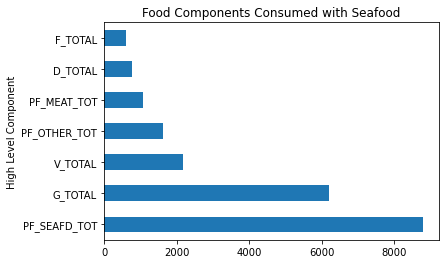

In [14]:
#Create a protein other total item, that excludes meats and seafood. Meant to capture
#other protein sources at a higher level
nhanes_full['PF_OTHER_TOT'] = nhanes_full['PF_TOTAL'] - nhanes_full['PF_MEAT_TOT'] - nhanes_full['PF_SEAFD_TOT']

#Create a list of the hierarchy 1 food components, for a higher level analysis
food_cmp_hr1 = [
'F_TOTAL',
'V_TOTAL',
'G_TOTAL',
'D_TOTAL',
'PF_OTHER_TOT',
'PF_MEAT_TOT',
'PF_SEAFD_TOT']

#Aggregate and plot the hierarchy 1 food components for the whole seafood meal subset
nhanes_food_cmp_hr1_sum = nhanes_full[food_cmp_hr1].sum()
nhanes_food_cmp_hr1_sum = nhanes_food_cmp_hr1_sum.sort_values(ascending=False)
nhanes_food_cmp_hr1_sum.plot.barh(title = 'Food Components Consumed with Seafood', xlabel = 'High Level Component', ylabel = 'Quantity in Grams')

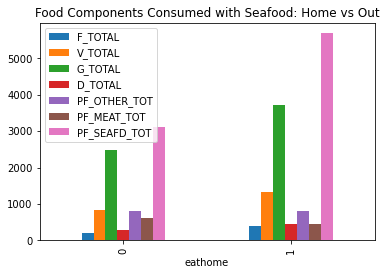

In [15]:
#Explore the aggregate of the hierarchy 1 food components within the eat at home vs out groups
nhanes_full_grouped = nhanes_full.groupby('eathome')[food_cmp_hr1].sum()
nhanes_full_grouped.plot.bar(title = 'Food Components Consumed with Seafood: Home vs Out')